In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\AKSHTA\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Load sales data from CSV
df = pd.read_csv(r'C:\Users\AKSHTA\Downloads\sales_data.csv')

In [3]:
# Display first few rows of the dataset
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [5]:
# Data Cleaning (Convert 'Date' to datetime format)
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Create additional columns for easier analysis
df['YearMonth'] = df['Date'].dt.to_period('M')
df['Profit_Margin'] = df['Profit'] / df['Revenue'] * 100

# Data Analysis

In [7]:
# Data Analysis
print("\nData Analysis:")
print("Total Revenue: $", df['Revenue'].sum())
print("Total Profit: $", df['Profit'].sum())
print("Average Order Quantity:", df['Order_Quantity'].mean())
print("Average Unit Price: $", df['Unit_Price'].mean())


Data Analysis:
Total Revenue: $ 85271008
Total Profit: $ 32221100
Average Order Quantity: 11.901659648253654
Average Unit Price: $ 452.9384266959199


In [8]:
# Product Category Analysis
product_category_sales = df.groupby('Product_Category')['Revenue'].sum()
print("\nProduct Category Sales:")
print(product_category_sales)


Product Category Sales:
Product_Category
Accessories    15117992
Bikes          61782134
Clothing        8370882
Name: Revenue, dtype: int64


In [9]:
# Country Analysis
country_sales = df.groupby('Country')['Revenue'].sum()
print("\nCountry Sales:")
print(country_sales)


Country Sales:
Country
Australia         21302059
Canada             7935738
France             8432872
Germany            8978596
United Kingdom    10646196
United States     27975547
Name: Revenue, dtype: int64


In [10]:
# Age Group Analysis
age_group_sales = df.groupby('Age_Group')['Revenue'].sum()
print("\nAge Group Sales:")
print(age_group_sales)


Age Group Sales:
Age_Group
Adults (35-64)          42584153
Seniors (64+)             308042
Young Adults (25-34)    30655614
Youth (<25)             11723199
Name: Revenue, dtype: int64


# Visualization

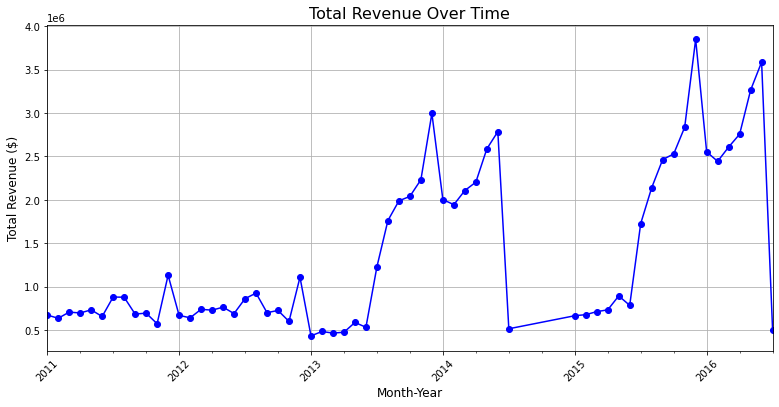

In [11]:
# Total Revenue Over Time (by Year/Month)
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()

plt.figure(figsize=(13, 6))
monthly_revenue.plot(kind='line', marker='o', color='b')
plt.title('Total Revenue Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

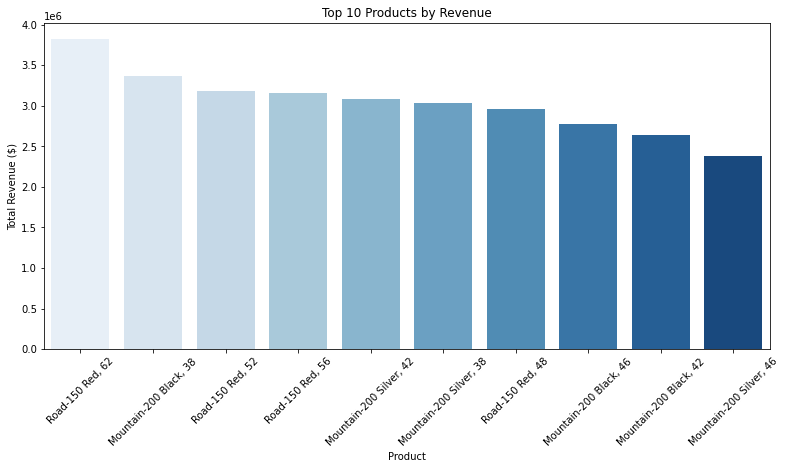

In [12]:
# Total Revenue Over Time (by Year/Month)
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()
plt.figure(figsize=(13, 6))
top_products_revenue = df.groupby('Product')['Revenue'].sum().nlargest(10)
sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values, palette='Blues')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

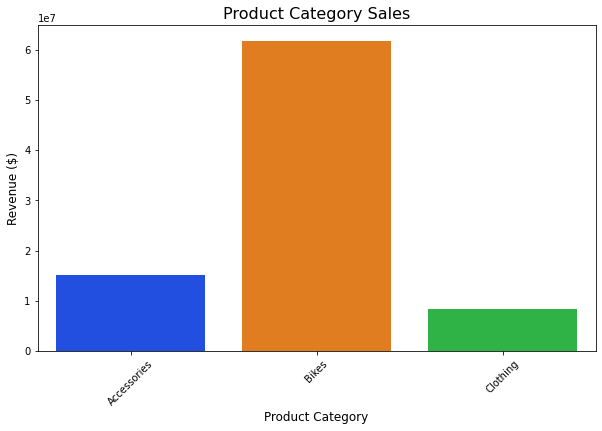

In [13]:
# Product Category Sales Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=product_category_sales.index, y=product_category_sales.values, palette='bright')
plt.title('Product Category Sales', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

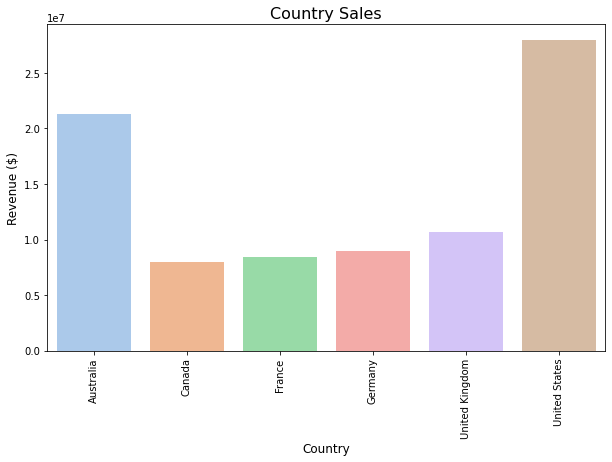

In [14]:
# Country Sales Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='pastel')
plt.title('Country Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

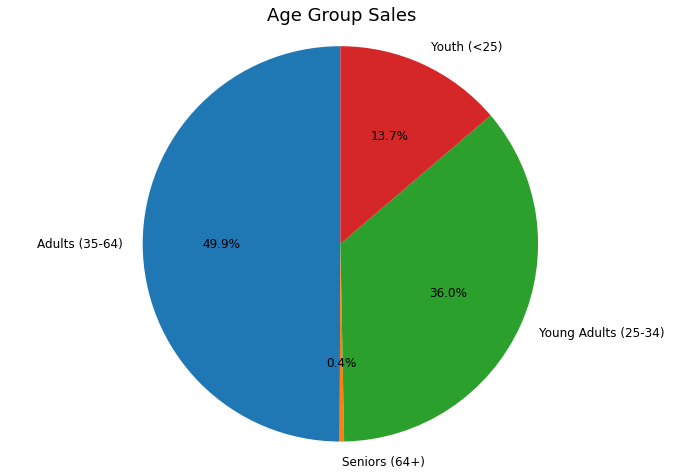

In [15]:
# Age Group Sales (Pie Chart)
plt.figure(figsize=(12, 8))
plt.pie(age_group_sales.values, labels=age_group_sales.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Age Group Sales', fontsize=18)
plt.axis('equal')
plt.show()

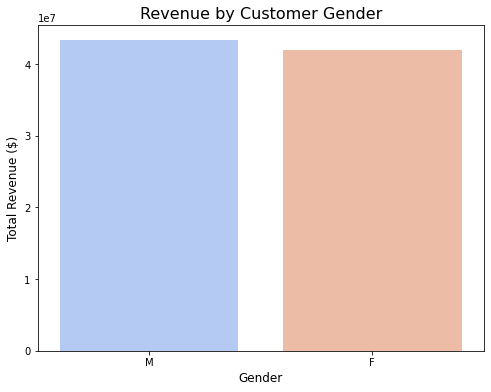

In [16]:
# Revenue by Customer Gender
gender_revenue = df.groupby('Customer_Gender')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_revenue.index, y=gender_revenue.values, palette='coolwarm')
plt.title('Revenue by Customer Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.show()

# Conclusion